In [5]:
from pygsp.graphs import Bunny
import numpy as np
import matplotlib.pyplot as plt
from src.ri_distances.pnt_cloud_generation import generate_rotation_matrix
from functools import lru_cache
plt.style.use('ggplot')

In [2]:
@lru_cache(maxsize=None)
def get_bunny_coord(keep_factor=0.6):
    data = Bunny().coords
    keep_factor = 1
    n_samples = int(data.shape[0] * keep_factor)

    data = np.random.permutation(data)[:n_samples]
    Q = generate_rotation_matrix(theta=4.8,axis=np.array([1,0,0]))
    # P =  generate_rotation_matrix(theta=0.3,axis=np.array([-0.4,1.0,1.0]))
    data_rot = data @ Q
    return data_rot

In [3]:
def plot_bunny(bunny_data,ax,color=None,label=None):
    ax.scatter3D(bunny_data[:,0],bunny_data[:,1],bunny_data[:,2], marker='o',
                   s=5, cmap='RdBu_r', vmin=-0.03, vmax=0.03,color=color,label=label)
    ax.legend()

In [ ]:
# Q = np.array([[-0.0469317 ,  0.71129176,  0.70132835],
#     [-0.92819778,  0.22838904, -0.29374706],
#     [-0.36911557, -0.66475746,  0.64950074]])

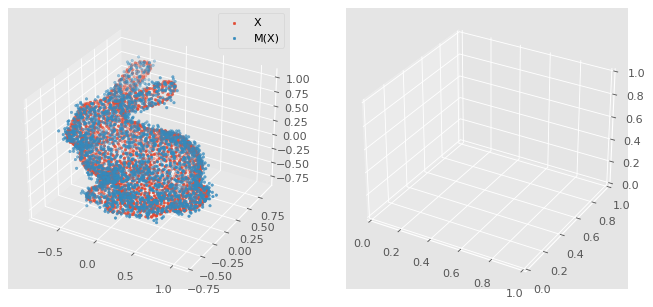

## Gif Bunny viz

In [42]:
from IPython.display import clear_output
from time import sleep

In [64]:

def plot_rotated_noisy_bunnies(rotated_bunny,noisy_bunny,ax):
    plot_bunny(rotated_bunny,ax,label='g·X')
    plot_bunny(noisy_bunny,ax,label='M(g·X)')
    

def get_fig_axes():
    fig = plt.figure(figsize=(8, 6))
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2,rowspan=2,projection="3d")
    ax2 = plt.subplot2grid((3, 2), (2, 0))
    ax3 = plt.subplot2grid((3, 2), (2, 1))
    
    return fig, ax1, ax2, ax3

In [70]:
# Bunny data
bunny = get_bunny_coord()

# rotation generation
thetas = np.linspace(0,1.5,4)
rot_axis = np.array([-0.30819149,  0.88919801, -1.36189371])

# noise generation
src_noise = np.random.randn(*bunny.shape) 
noise_factors = np.arange(0.04,0.12,0.02)
noise = src_noise * noise_factors[0] # initialize it for the rotation

sleep_time = 0.8
img_idx = 0

def generate_rotated_bunnies(bunny,thetas,rot_axis):
    rotated_bunnies = []
    for theta in thetas:
        Q = generate_rotation_matrix(axis=rot_axis,theta=theta)
        rotated_bunny = bunny @ Q
        rotated_bunnies.append(rotated_bunny)
    return rotated_bunnies

def generate_noisy_bunnies(bunny,noise_factors,src_noise):
    noisy_bunnies = []
    for noise_factor in noise_factors:
        noise = src_noise * noise_factor
        noisy_bunny = bunny + noise
        noisy_bunnies.append(noisy_bunny)
    return noisy_bunnies


rotated_bunnies = generate_rotated_bunnies(bunny,thetas,rot_axis)
noisy_bunnies = generate_noisy_bunnies(bunny,noise_factors,src_noise)

def MSE(x,y):
    return ((x-y)**2).mean()

def get_noise2MSEs(rotated_bunnies,noisy_bunnies,noise_factors):
    nois2mse = {}
    for noise_factor,noisy_bun in zip(noise_factors,noisy_bunnies):
        mses = []
        for rot_bun in rotated_bunnies:
            mses.append(MSE(noisy_bun,rot_bun))
        nois2mse[noise_factor] = mses
    return nois2mse

nois2mse = get_noise2MSEs(rotated_bunnies,noisy_bunnies,noise_factors)

def go_and_back(iterator):
    for i,el in enumerate(iterator[:-1]):
        yield i,el
    for i,el in reversed(list(enumerate(iterator))):
        yield i,el

nois_bun = noisy_bunnies[0]
noise_factor = noise_factors[0]
mse = nois2mse[noise_factor]

max_mse = max([max(mse) for mse in nois2mse.values()])
mse_ylims = (0,max_mse)

def plot_angles_MSE(thetas,mse,ylims,ax):
    ax.plot(thetas,mse)
    ax.vlines(thetas[i],*ylims,color='y')
    ax.set_title("MSE(X,M(X))")
    ax.set_xlabel("Angle in radian")
    ax.set_ylabel("MSE")
    ax.set_ylim(*ylims)

for i,rot_bun in go_and_back(rotated_bunnies):
    fig, ax1,ax2,ax3 = get_fig_axes()
    plot_rotated_noisy_bunnies(rot_bun,nois_bun,ax1)
    plot_angles_MSE(thetas,mse,mse_ylims,ax2)
    plt.show()
    sleep(sleep_time)
    clear_output()
    img_idx += 1
    


In [ ]:

for noise_factor in go_and_back(noise_factors): 
    print(f"theta:{theta},noise_factor:{noise_factor}")
    fig, ax1,ax2,ax3 = get_fig_axes()
    noise = src_noise * noise_factor
    plot_src_rotated_bunnies(bunny,Q,noise,ax1)
    plt.show()
    sleep(sleep_time)
    clear_output()
    i += 1